# Исследование данных о продажах игр

В датасете содержатся исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Цель исследования:** Выявить определяющие успешность игры закономерности, которые помогут сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


**Ход исследования:**
Данные получим из датасета `/datasets/games.csv`. 
Необходимо провести обзор данных перед исследованием, так как о качестве данных ничего не известно. На этапе предобработки проверим ошибки в данных и поправим их в случае необходимости для избежания их влияния на конечный результат.

Таким образом, исследование пройдет в 8 этапов:
1. Постановка задачи
2. Получение данных
3. Обзор данных
4. Предобработка данных:
   - Обработка типов данных
   - Обработка пропусков
   - Устранение дубликатов при их наличии
   - Добавление новых столбцов при необходимости
5. Исследовательский анализ данных:
   - Анализ количества игр, выпускающихся в разные годы
   - Анализ изменения количества продаж по платформам
   - Определение актуального периода, по данным за который можно делать прогнозы на 2017 год
   - Анализ платформ по росту и падению продаж
   - Построение графика "ящик с усами" по глобальным продажам игр в разбивке по платформам
   - Анализ влияния отзывов пользователей и критиков на продажи внутри одной популярной платформы
   - Анализ распределения игр по жанрам
6. Исследование портрета пользователя каждого региона, определение для каждого региона:
   - Самых популярных платформ (топ-5)
   - Самых популярных жанров
   - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
7. Проверка гипотез
   - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
   - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
8. Оформление результатов и выводов


**Описание данных:**

В датасете содержатся данные до 2016 года. Представим, что сейчас декабрь 2016 года, и мы планируем кампанию на 2017 год.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Данные за 2016 год могут быть неполными.

### Откроем файл с данными и изучим общую информацию.

#### Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы.

In [63]:
#импортируем библиотеки
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings

In [64]:
#прочитаем данные
try: 
    data = pd.read_csv('/Users/margarita/Desktop/datasets/games.csv', sep=',')
except:
    data = pd.read_csv('/datasets/games.csv', sep=',')

#### Выведем первые строки  набора данных. Изучим общую информацию о датафрейме.

In [65]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:** В датасете содержится 16715 записей. Можно заметить, что данные являются неполными: имеются пропуски. Кроме того, не все типы данных указаны корректно.

### Выполним предобработку данных

#### Скорректируем названия столбцов (приведем к нижнему регистру).

In [67]:
data.columns = map(str.lower, data.columns)

In [68]:
#выполним проверку
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Преобразуем данные в нужные типы. 

Данные в столбце `user_score` необходимо привести в типу float.
Данные в столбце `year_of_release` было принято решение не приводить к типу даты. Текущий тип будет удобен для построения графиков.

In [69]:
#данные в столбце user_score необходимо привести в типу float, 
#однако появляется ошибка, которая не дает этого сделать
#в связи с этим выведем уникальные значения столбца
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [70]:
#в данных выше значение "tbd" превратим в NaN и преобразуем столбец в тип float
data.loc[data['user_score']=='tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype(float)

In [71]:
#выполним проверку
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [72]:
#могут быть ошибки в количестве знаков после запятой для проданных копий, 
#округлим значения до 6 знаков после запятой
#так как количество дано в миллионах и должно быть целочисленным при переводе в штуки
round(data['na_sales'], 6)
round(data['eu_sales'], 6)
round(data['jp_sales'], 6)

#выполним проверку преобразования типов данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


**Вывод:** Преобразовали данные в столбце `user_score` к типу float.

#### Обработаем пропуски.

In [73]:
#проверим датасет на наличие пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [74]:
#определим процент пропусков
pd.DataFrame(round(data.isna().mean()*100)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


In [75]:
#пропуски с годом релиза, а также названием и жанром исключим
data = data.dropna(subset=['year_of_release', 'name', 'genre'])

#выполним проверку
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

**Вывод:** Проверка на наличие пропусков показала, что есть пропуски в столбцах `name`, `year_of_release`, `critic_score`, `genre`, `user_score`, `raiting`. К пропускам могли привести ошибки компьютера, а также тот факт, что данные тянутся из разных источников, возможно, некоторые данные в тех источниках являются не считаются и отсутствуют. Было принято решение не заполнять данные пропуски, так как их заполнение может повлиять на итоговый вывод. Данные с пропусками в столбцах `name`, `year_of_release`, `genre` были исключены из рассмотрения, так как они затрудняют дальнейшее построение таблиц, и в то же время не оказывают влияния на итоговый результат ввиду своего маленького количества (менее 2%).

#### Создадим столбец по суммарным продажам во всех регионах.

In [76]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

#### Обработаем дубликаты.

In [77]:
#проверим датасеты на наличие явных дубликатов
data.duplicated().sum()

0

In [78]:
#проверим датасет на наличие дубликатов по имени, платформе и году релиза
data[data.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01


In [79]:
#удалим этот дубликат и обновим индексы
data = data.drop(labels = [16230],axis = 0)
data = data.reset_index()

**Вывод:** На этапе обработки данных были:
- скорректированы названия столбцов (приведены к нижнему регистру)
- преобразованы типы данных на корректные
- обработаны пропуски
- создан дополнительных столбец с суммарный значением продаж по регионам
- исследованы данные на наличие дубликатов

Проверка на наличие пропусков показала, что есть пропуски в столбцах `name`, `year_of_release`, `critic_score`, `genre`, `user_score`, `raiting`. К пропускам могли привести ошибки компьютера, а также тот факт, что данные тянутся из разных источников, возможно, некоторые данные в тех источниках являются не считаются и отсутствуют. Было принято решение не заполнять данные пропуски, так как их заполнение может повлиять на итоговый вывод. Данные с пропусками в столбцах `name`, `year_of_release`, `genre` были исключены из рассмотрения, так как они затрудняют дальнейшее построение таблиц, и в то же время не оказывают влияния на итоговый результат ввиду своего маленького количества (менее 2%).

Явные дубликаты отсутствуют. Был обнаружен неявный дубликат, который был удален.

In [80]:
#добавим заглушку в столбец с рейтингом ESRB
data['rating'] = data['rating'].fillna('Unknown')

### Проведем исследовательский анализ данных.

#### Посмотрим, сколько игр выпускалось в разные годы.

In [81]:
#найдем частоту встречаемости каждого года
data.sort_values(by='year_of_release')['year_of_release'].value_counts(sort=False)

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     652
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: count, dtype: int64

In [82]:
#выполним настройки
sns.set(rc={'figure.figsize': (14, 4)})

In [83]:
#убираем необязательные предупреждения
warnings.filterwarnings('ignore')

In [84]:
#найдем диапазон лет, за который есть данные в датасете
data['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

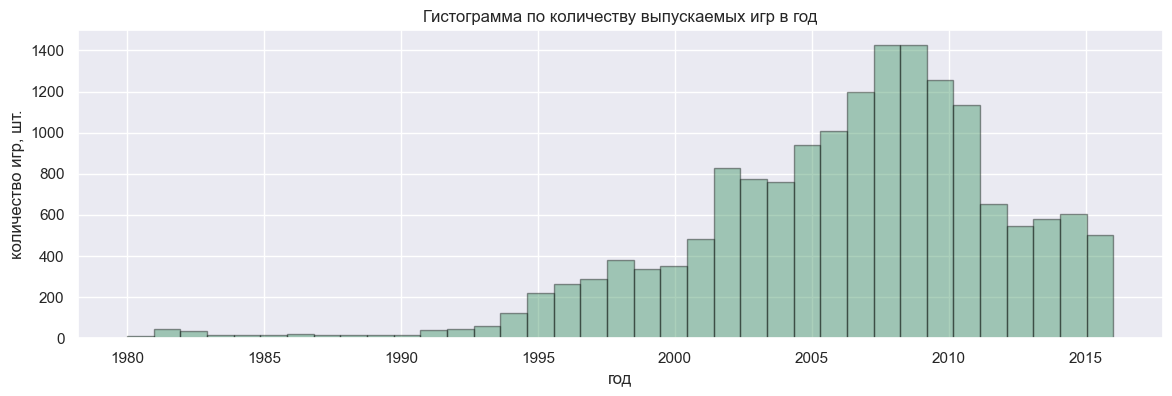

In [85]:
sns.distplot(data['year_of_release'], hist=True, kde=False, 
             bins=2016-1980+1, color = 'seagreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}).set(ylabel='количество игр, шт.', 
                                           xlabel='год',  
                                           title='Гистограмма по количеству выпускаемых игр в год') 
plt.xticks([1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015])
plt.show()

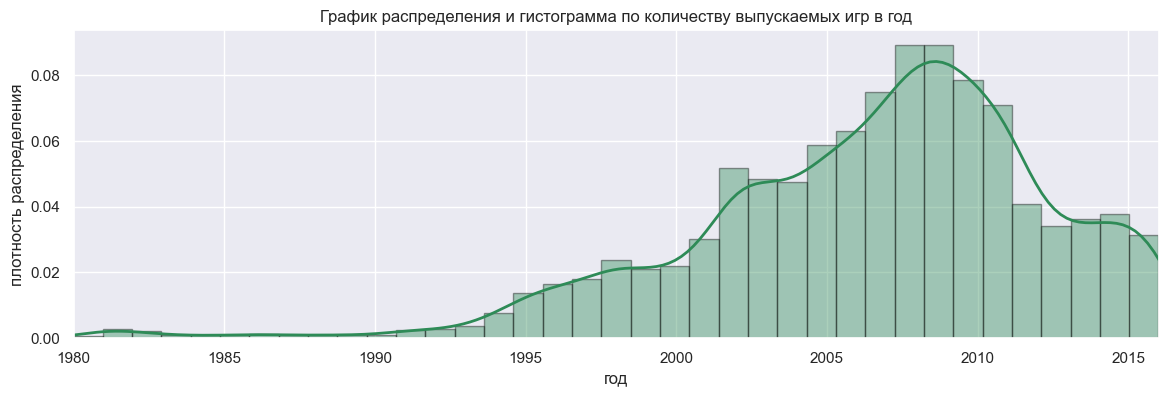

In [86]:
#построим график распределения
#и соответствующую гистограмму
sns.distplot(data['year_of_release'], hist=True, kde=True, 
             bins=2016-1980+1, color = 'seagreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}).set(xlim=[1996, 2016], 
                                           ylabel='плотность распределения', 
                                           xlabel='год',  
                                           title='График распределения и гистограмма по количеству выпускаемых игр в год') 
plt.xticks([1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015])
plt.show()

**Вывод:** Гистограмма показала, что с 1980 года количество игр, выпускающихся в год, росло вплоть до 2008 года. Пик приходится на 2008-2009 годы, где количество выпущенных игр составляет 1427 и 1426 штук, соответственно. Затем темп производства игр начал снижаться, и количество выпущенных игр в 2016 году составило 502 штуки.

#### Посмотрим, как менялись продажи по платформам. 

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос, за какой характерный срок появляются новые и исчезают старые платформы.

In [87]:
#Найдем топ-5 платформ с наибольшими суммарными продожами.
data.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False).head(5).reset_index()

,index,platform,total_sales
0,16,PS2,1233.56
1,28,X360,961.24
2,17,PS3,931.33
3,26,Wii,891.18
4,4,DS,802.78


In [88]:
#создадим отдельный столбец с топ-5 платформ по суммарным продажам
platform_top5 = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False).head(5).reset_index()['platform']

#создадим датафрейм с продажами по годам
sales_data = data.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').reset_index()

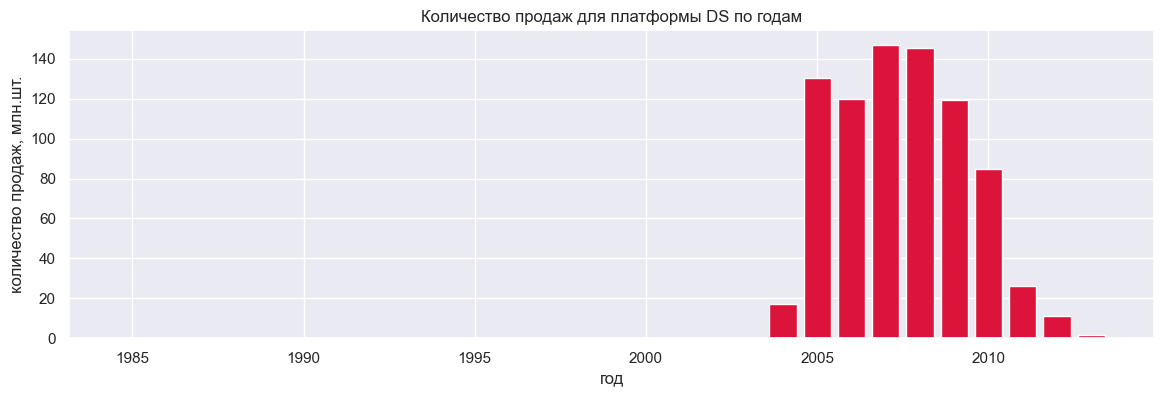

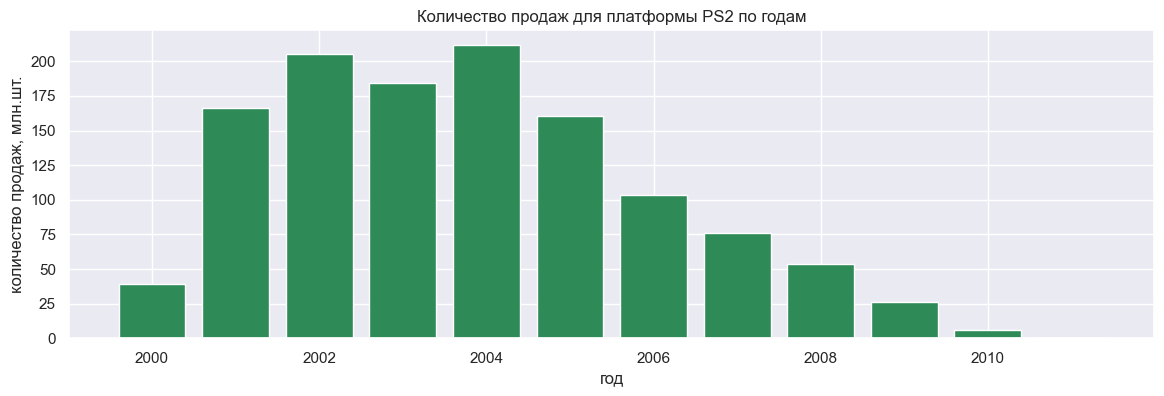

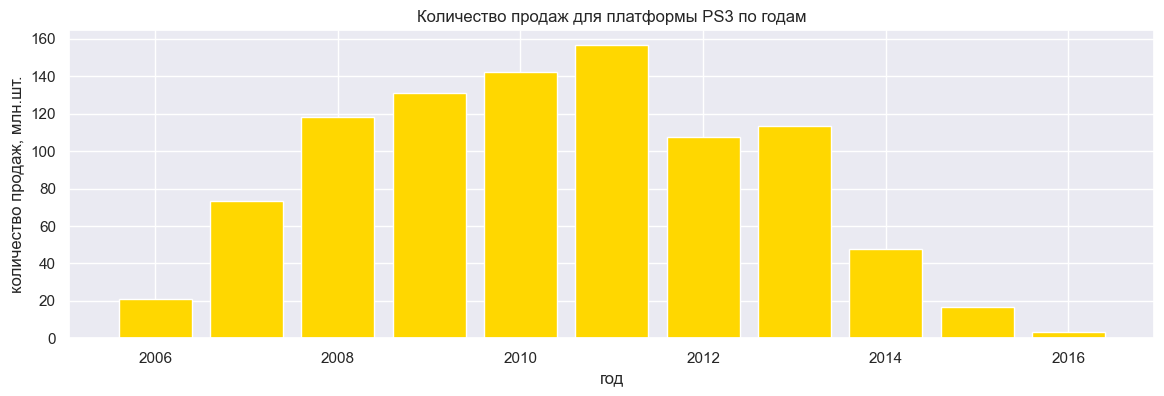

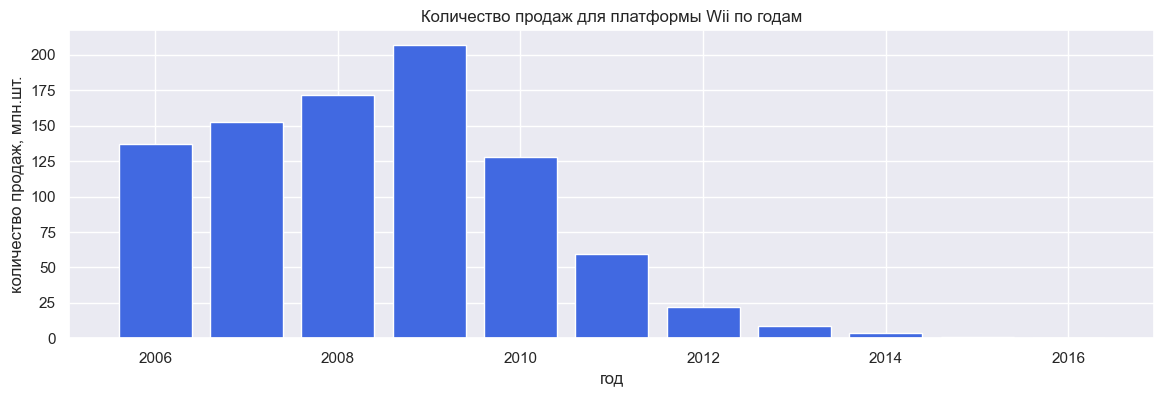

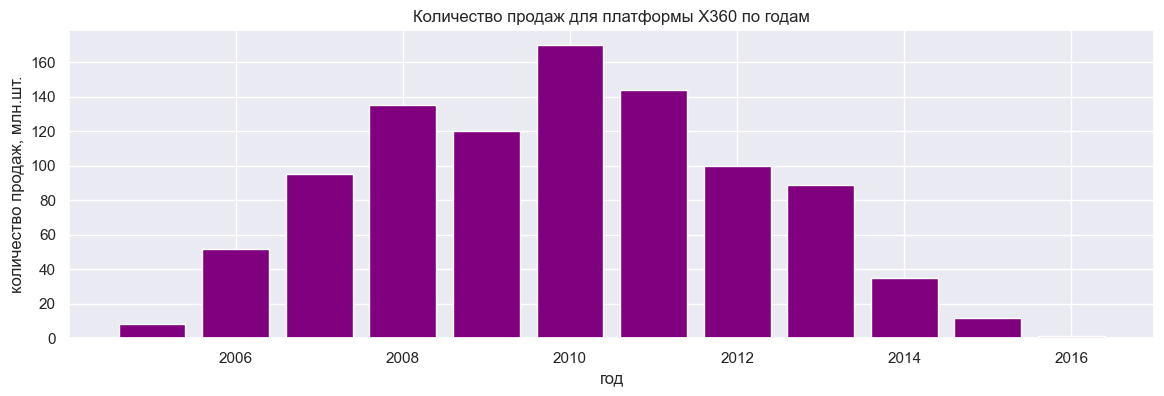

In [89]:
colors = ['crimson', 'seagreen', 'gold', 'royalblue', 'purple'] #палитра для цветов графиков
i=0 #счетчик для выбора цвета

for platform in sales_data.query('platform in @platform_top5')['platform'].unique():
    ax = plt.bar(sales_data.query('platform == @platform')['year_of_release'], sales_data.query('platform == @platform')['total_sales'], #данные для построения гистограммы
            color = colors[i])
    plt.title(f'Количество продаж для платформы {platform} по годам')
    plt.ylabel('количество продаж, млн.шт.')
    plt.xlabel('год')
    plt.show()
    
    i += 1

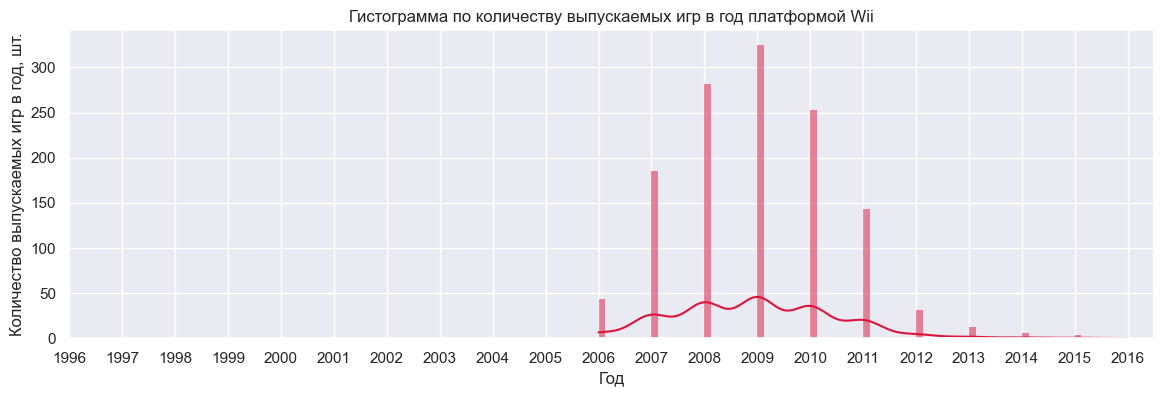

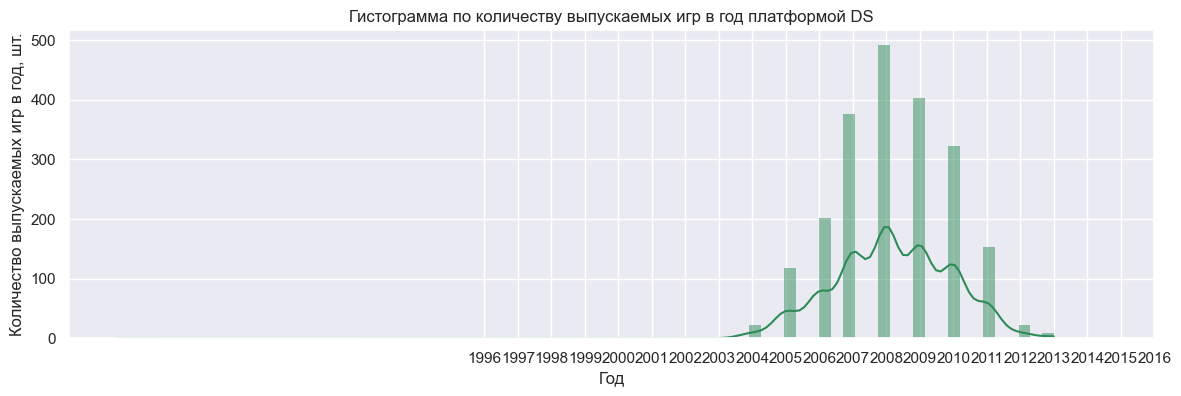

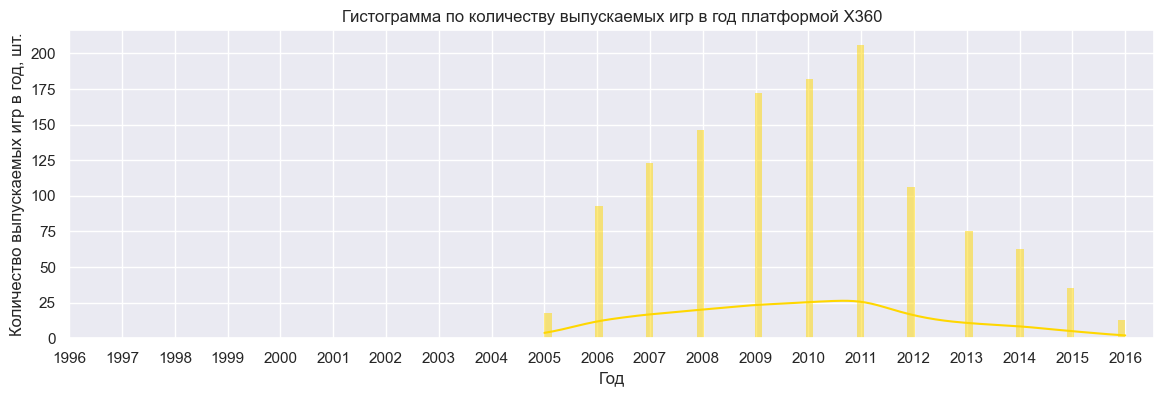

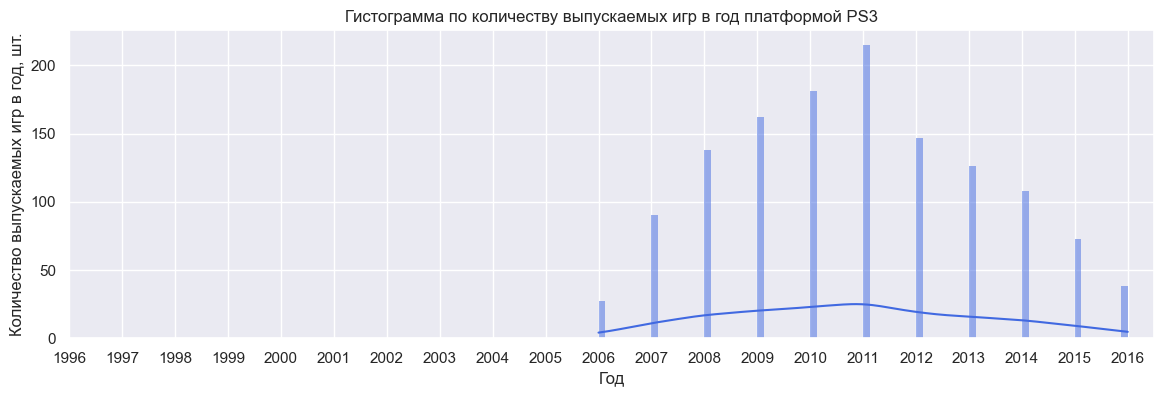

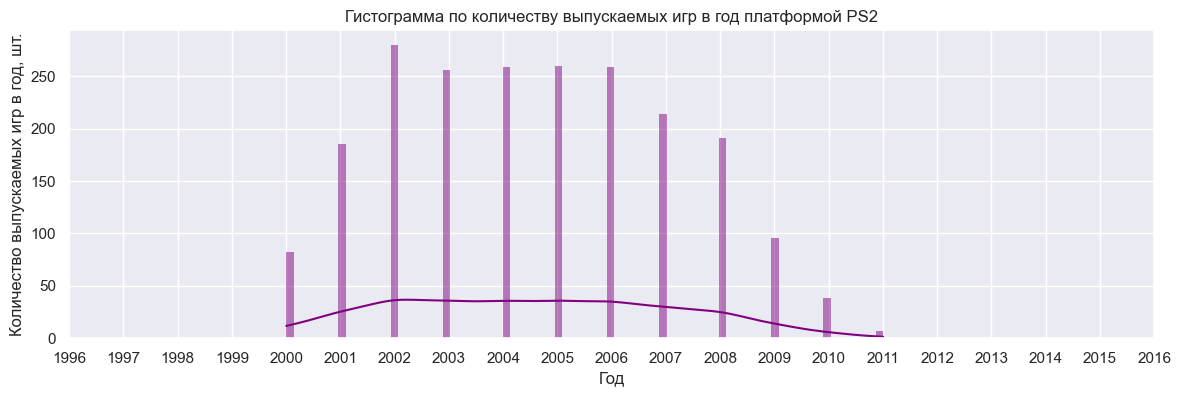

In [90]:
#построим гистограммы и плотности распределения для топ-5 платформ с наибольшими суммарными продажами

colors = ['crimson', 'seagreen', 'gold', 'royalblue', 'purple'] #палитра для цветов графиков
i=0 #счетчик для выбора цвета

for platform in data.query('platform in @platform_top5')['platform'].unique():
    sns.histplot(data.query('platform == @platform')['year_of_release'], #данные для построения гистограммы
                 kde=True, #строим распределение
                 bins=80, #количество корзин
                 color = colors[i],
                 linewidth=0)
    plt.xlim=[1996, 2016]
    plt.title(f'Гистограмма по количеству выпускаемых игр в год платформой {platform}')
    plt.ylabel('Количество выпускаемых игр в год, шт.')
    plt.xlabel('Год')
    plt.xticks(range(1996, 2017)) #шаг и диапазон по оси x
    plt.show()
    i+=1

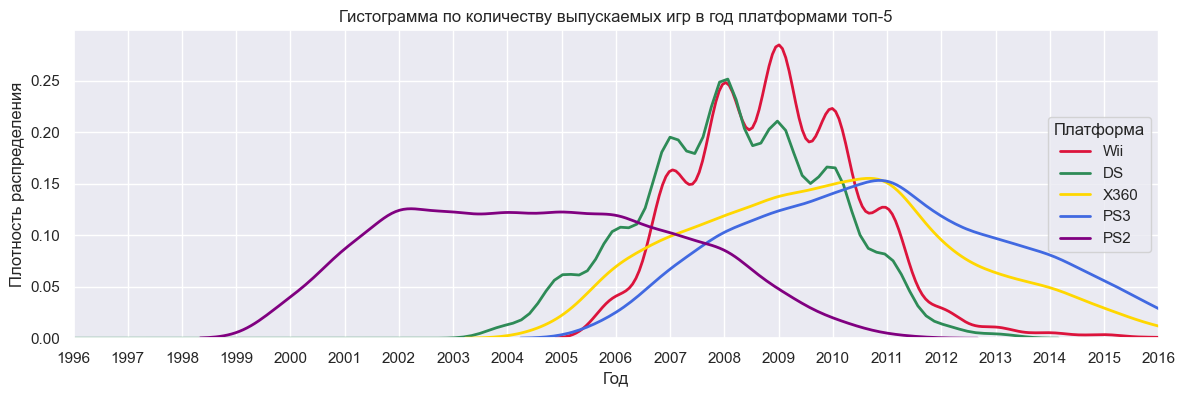

In [91]:
#объединим распределения на один график

i=0 #обнулим счетчик для выбора цвета

for platform in data.query('platform in @platform_top5')['platform'].unique():
    sns.distplot(data.query('platform == @platform')['year_of_release'], #данные для построения гистограммы
                 hist=False, kde=True, #строим гистограмму и распределение
                 bins=80, #количество корзин
                 color = colors[i], #цвет графика
                 label=platform,
                 kde_kws={'linewidth': 2}).set(xlim=[1996, 2016], #подписи графика
                                               ylabel='Плотность распределения', 
                                               xlabel='Год',  
                                               title=f'Гистограмма по количеству выпускаемых игр в год платформами топ-5') 
    plt.legend(loc='center right', title='Платформа')
    plt.xticks(range(1996, 2017)) #шаг и диапазон по оси x
    i+=1

In [92]:
for platform in sales_data.query('platform in @platform_top5')['platform'].unique():
    print(f'По количеству продаж для платформы {platform}:')
    print('Медиана составляет', round(sales_data.query('platform == @platform')['total_sales'].median(), 2), 'млн. в год')
    print('Итого количество продаж составляет', round(sales_data.query('platform == @platform')['total_sales'].sum(), 2), 'млн.')
    print('Максимальное количество продаж в год составляет', round(sales_data.query('platform == @platform')['total_sales'].max(), 2), 'млн. в год')
    print('')   

По количеству продаж для платформы DS:
Медиана составляет 85.02 млн. в год
Итого количество продаж составляет 802.78 млн.
Максимальное количество продаж в год составляет 146.94 млн. в год

По количеству продаж для платформы PS2:
Медиана составляет 89.7 млн. в год
Итого количество продаж составляет 1233.56 млн.
Максимальное количество продаж в год составляет 211.81 млн. в год

По количеству продаж для платформы PS3:
Медиана составляет 107.35 млн. в год
Итого количество продаж составляет 931.33 млн.
Максимальное количество продаж в год составляет 156.78 млн. в год

По количеству продаж для платформы Wii:
Медиана составляет 59.65 млн. в год
Итого количество продаж составляет 891.18 млн.
Максимальное количество продаж в год составляет 206.97 млн. в год

По количеству продаж для платформы X360:
Медиана составляет 92.0 млн. в год
Итого количество продаж составляет 961.24 млн.
Максимальное количество продаж в год составляет 170.03 млн. в год



**Вывод:** 
В ТОП-5 успешных платформ по суммарный продажам входят PS2, X360, PS3, Wii и DS (платформы расположены по убыванию продаж).
Суммарное количество продаж в год для этих платформ по имеющимся данным составляет 1233.56, 961.24, 931.34, 891.18 и 802.78 млн.копий, соответственно.

Для всех успешных платформ с наибольшим суммарным количеством продаж графики продаж имеют схожую тенденцию: сначала довольно резко возрастают до определенного пика, а потом более плавно убывают. 

Максимальное количество продаж в год для ТОП-5 наиболее успешных платформ приходится на PS2 и составляет 211.81 млн. продаж в год. Минимальное количество продаж - на DS и составляет 146.94 млн. продаж в год.

Максимлаьное значение медианы продаж в год среди ТОП-5 приходится на PS3 и составляет 107.36 млн. продаж в год. Минимальное значение медианы - на Wii и составляет 59.65 млн. в год.

Период жизни платформ составляет 7 лет.
Новые платформы появляются за характерный срок около 15 лет.

In [93]:
# Комментарий ревьюера
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

#### Анализ платформ по росту и падению продаж.

Определим, какие платформы лидируют по продажам, растут или падают. Тем самым выберем потенциально прибыльные платформы.

Для этого выберем актуальный период для анализа исходя из предыдущих пунктов. 

Разумно взять период за последние 3 года (2014-2016 годы).

In [94]:
#запишем данные за последние 2 года в отдельный датасет
real_data = data.query('year_of_release > 2013')

In [95]:
#Найдем топ-5 платформ с наибольшими суммарными продажами за 2015-2016 годы
data_3_years = real_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False).head(5).reset_index(drop=True)
data_3_years

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22


In [96]:
#создадим отдельный столбец с топ-15 платформ по суммарным продажам за последние 3 года
platform_top5 = data_3_years['platform']

#создадим датафрейм с продажами по годам c 2014 года
sales_data_3_years = real_data.query('platform in @platform_top5').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').reset_index()
sales_data_3_years

platform,year_of_release,3DS,PS3,PS4,X360,XOne
0,2014.0,43.76,47.76,100.00,34.74,54.07
1,2015.0,27.78,16.82,118.90,11.96,60.14
2,2016.0,15.14,3.60,69.25,1.52,26.15


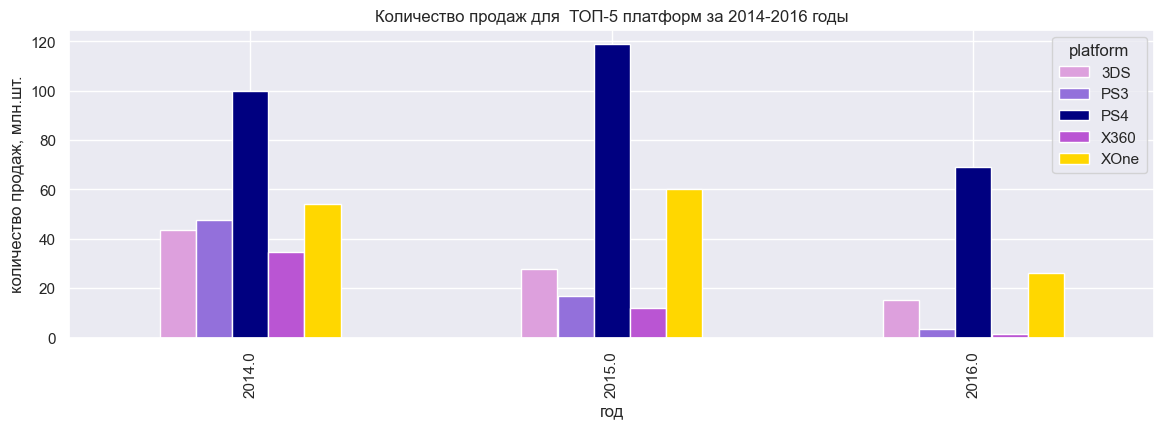

In [97]:
#построим график и проанализируем платформы по росту и падению продаж
sales_data_3_years.plot(x='year_of_release', y=['3DS', 'PS3', 'PS4', 'X360', 'XOne'], kind='bar', color=['plum', 'mediumpurple', 'navy', 'mediumorchid', 'gold'], \
                grid=True, xlabel='год', ylabel='количество продаж, млн.шт.', title='Количество продаж для  ТОП-5 платформ за 2014-2016 годы')
plt.show()

**Вывод:** 

Для оценки потенциально прибыльных платформ были визуализированы данные по количеству продаж для ТОП-5 платформ с наибольшим количеством продаж за последние 3 года (с 2014 по 2016 год включительно).

В ТОП-5 по количеству продаж попали платформы:
- PS4 - количество продаж за 2014-2016 гг. составляет 288.15 млн.шт.
- XOne - количество продаж за 2014-2016 гг. составляет 140.36 млн.шт.
- 3DS - количество продаж за 2014-2016 гг. составляет 86.68 млн.шт.
- PS3 - количество продаж за 2014-2016 гг. составляет 68.18 млн.шт.
- X360 - количество продаж за 2014-2016 гг. составляет 48.22 млн.шт.

Потенциально прибыльными платформами являются платформы 3DS, PS4, XOne.

#### Построим графики «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [98]:
#определим количество платформ
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

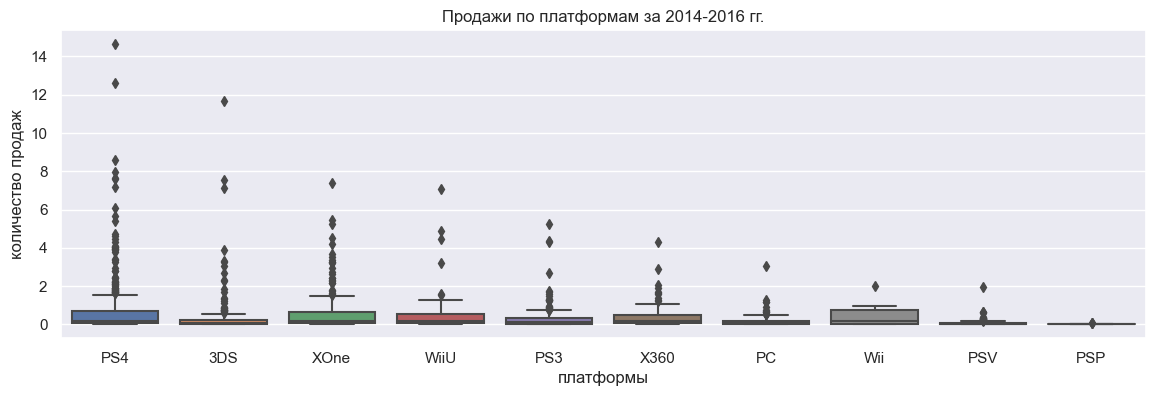

In [99]:
#построим графики "ящик с усами" в разном масштабе по данным за последние 2015-2016 гг.
sns.boxplot(x=real_data['platform'], y=real_data['total_sales']).set(title='Продажи по платформам за 2014-2016 гг.', xlabel='платформы', ylabel='количество продаж')
plt.show()

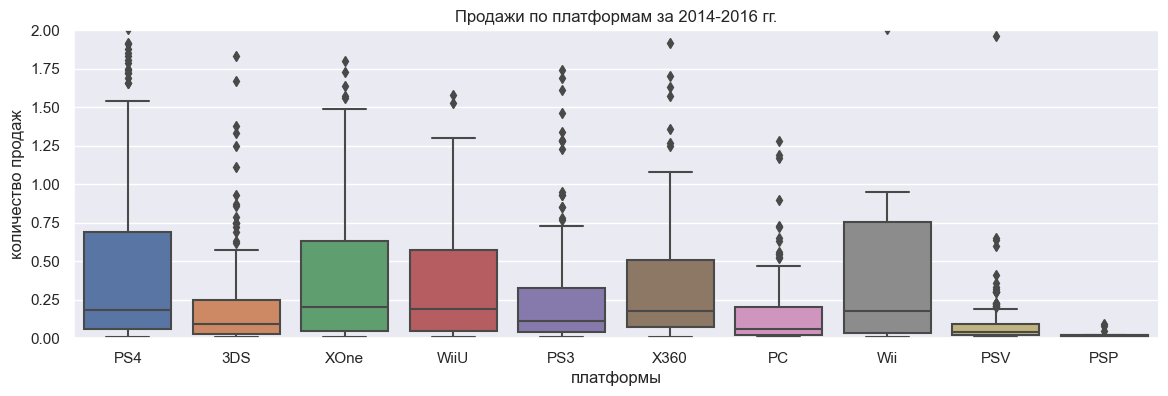

In [100]:
sns.boxplot(x=real_data['platform'], y=real_data['total_sales']).set(title='Продажи по платформам за 2014-2016 гг.', xlabel='платформы', ylim=(0,2), ylabel='количество продаж')
plt.show()

**Вывод:** 

Графики "ящик с усами" были построены на данных за последние 3 года (с 2014 по 2016 год).

Представленные платформы сильно отличаются по количеству продаж. Есть лидеры и отстающие.

По данным за 2014-2016 годы:
- По основной части игр по платформам 3й квартиль по продажам не превышает 1 млн копий.Однако существуют и выбросы - аномально большое количество проданных копий. С их учетом для всех платформ количество продаж для каждой игры в год не превышает 16 млн.копий.
- Наибольшие медианные значения по количеству продаж характерны для платформ PS4, XOne, WiiU, X360, Wii.
- В отстающих по количеству продаж за последние 2 года находятся платформы PSP и PSV.

#### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Ранее были определены лидеры по количеству продаж за последние 3 года (2014-2016 гг.): PS4, XOne, 3DS, X360, PS3. Данные платформы являются перспективными кандидатами на роль лидеров продаж в 2017 году. 

Изучим, как влияют отзывы пользователей и критиков на продажи.

##### Влияние отзывов критиков на продажи.

Коэффициент Пирсона зависимости продаж от отзывов критиков для платформы PS4: 0.4026614106810409


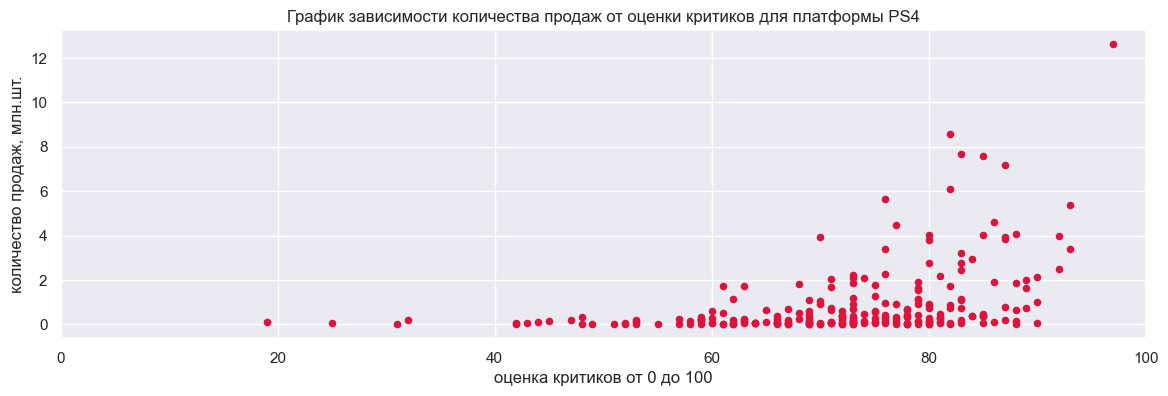


Коэффициент Пирсона зависимости продаж от отзывов критиков для платформы 3DS: 0.314117492869051


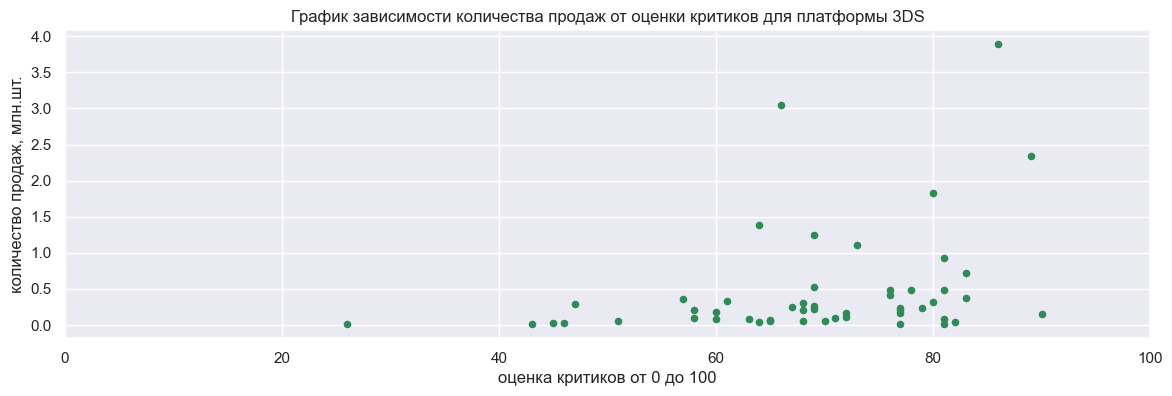


Коэффициент Пирсона зависимости продаж от отзывов критиков для платформы XOne: 0.42867694370333187


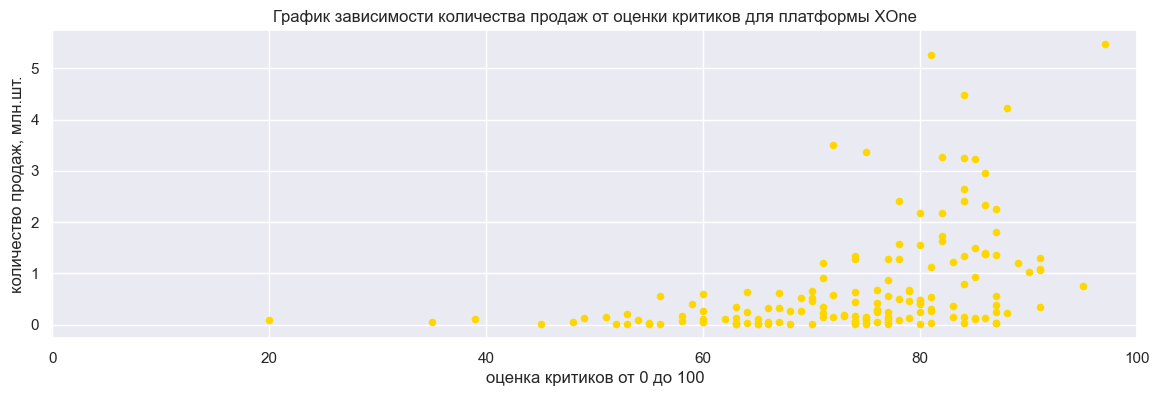


Коэффициент Пирсона зависимости продаж от отзывов критиков для платформы PS3: 0.44657460493190704


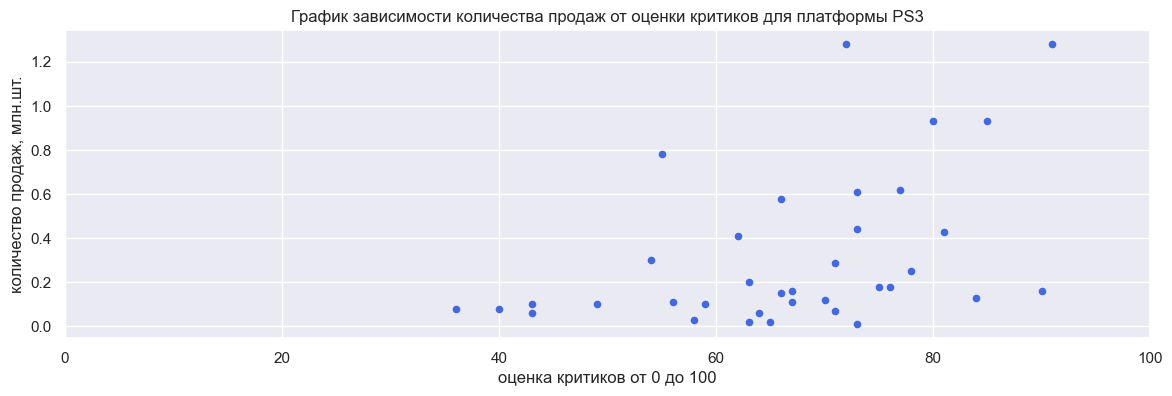


Коэффициент Пирсона зависимости продаж от отзывов критиков для платформы X360: 0.5257228356581523


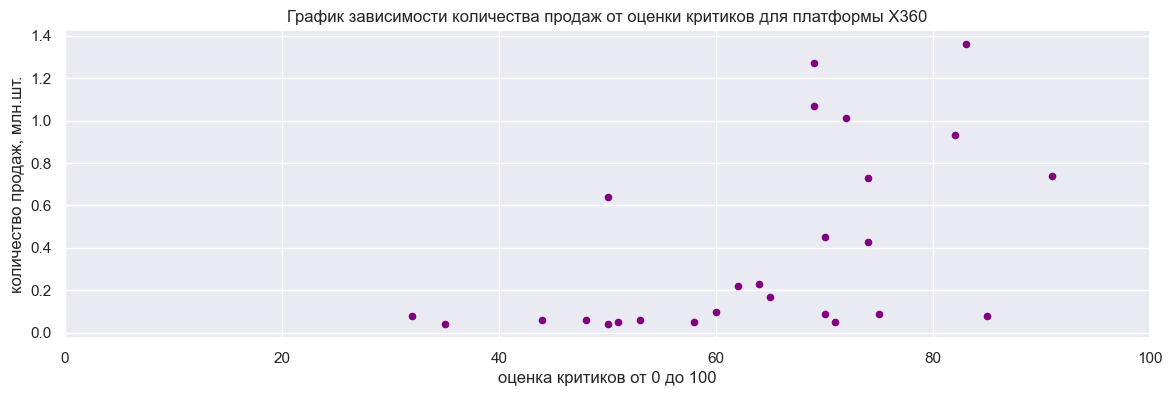

In [101]:
#создадим отдельный столбец с топ-5 платформ по суммарным продажам
platform_top5_2years = real_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales', ascending=False).head(5).reset_index()['platform']

colors = ['crimson', 'seagreen', 'gold', 'royalblue', 'purple'] #палитра для цветов графиков
i=0 #счетчик 

for platform in real_data.query('platform in @platform_top5_2years')['platform'].unique():
    real_data.query('platform == @platform').plot(kind='scatter', x='critic_score', y='total_sales', \
                                                  color=colors[i], grid=True, xlim=(0, 100), \
                                                  xlabel='оценка критиков от 0 до 100', \
                                                  ylabel='количество продаж, млн.шт.', \
                                                  title=f'График зависимости количества продаж от оценки критиков для платформы {platform}')   
    print(f'Коэффициент Пирсона зависимости продаж от отзывов критиков для платформы {platform}:', real_data.query('platform == @platform')['critic_score'].corr(real_data.query('platform == @platform')['total_sales']))
    i += 1
    plt.show()
    print('')

In [102]:
#проверим, почему так мало данных для платформы PS3
real_data.query('platform == "PS3"').info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 180 to 16438
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            219 non-null    int64  
 1   name             219 non-null    object 
 2   platform         219 non-null    object 
 3   year_of_release  219 non-null    float64
 4   genre            219 non-null    object 
 5   na_sales         219 non-null    float64
 6   eu_sales         219 non-null    float64
 7   jp_sales         219 non-null    float64
 8   other_sales      219 non-null    float64
 9   critic_score     36 non-null     float64
 10  user_score       98 non-null     float64
 11  rating           219 non-null    object 
 12  total_sales      219 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 24.0+ KB


##### Влияние отзывов пользователей на продажи.

Коэффициент Пирсона зависимости продаж от отзывов пользователей для платформы PS4: -0.04013158947269733


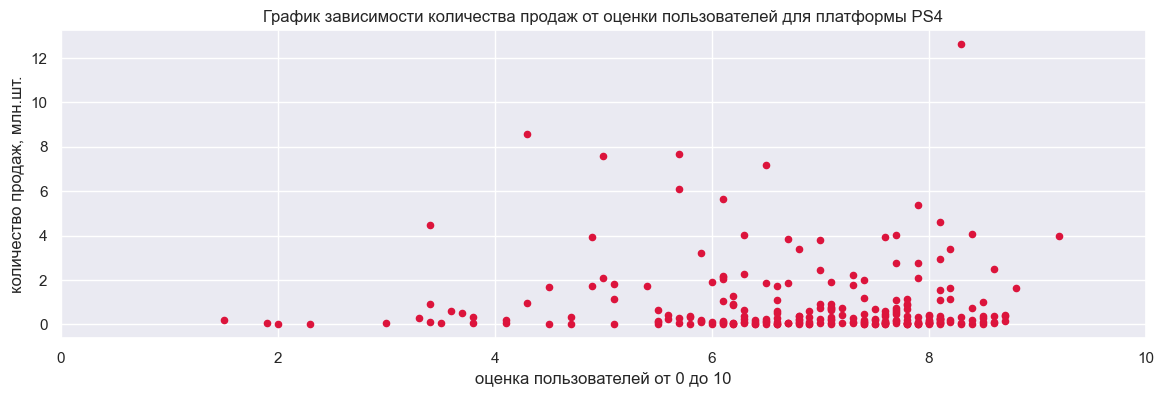


Коэффициент Пирсона зависимости продаж от отзывов пользователей для платформы 3DS: 0.2151932718527028


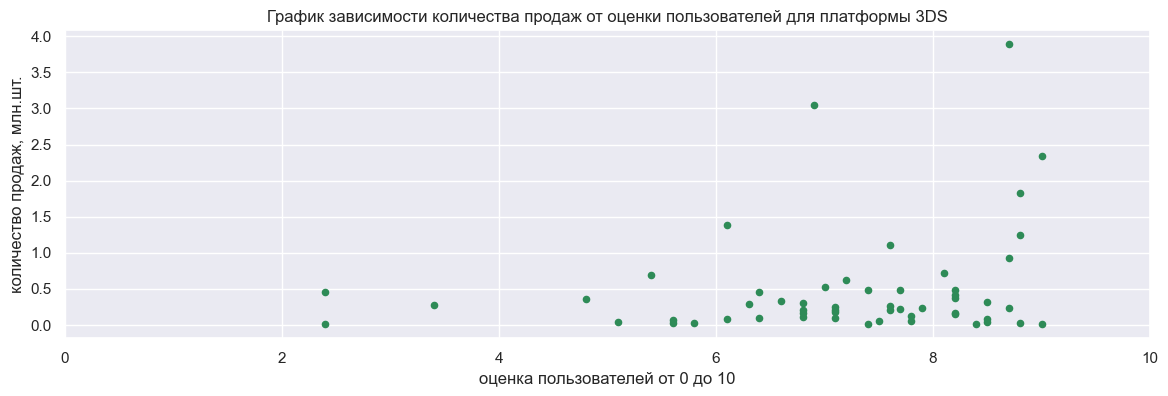


Коэффициент Пирсона зависимости продаж от отзывов пользователей для платформы XOne: -0.07038392806475809


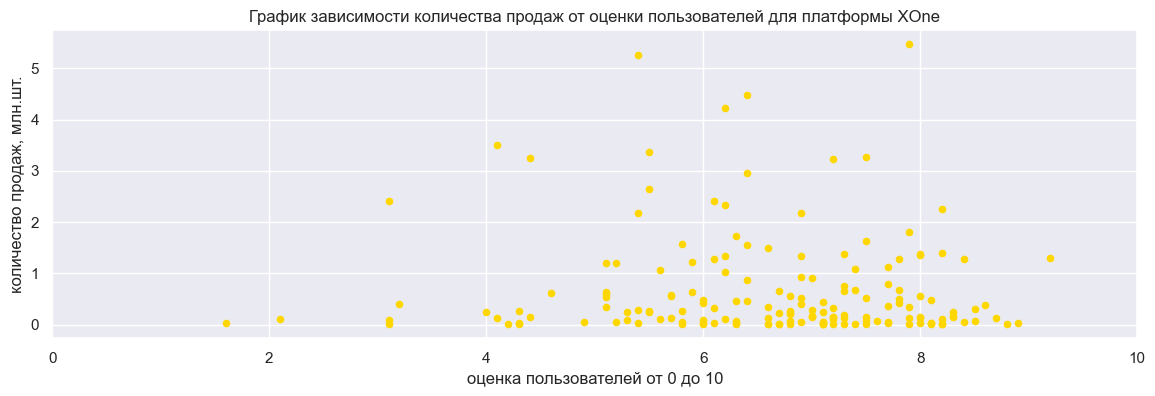


Коэффициент Пирсона зависимости продаж от отзывов пользователей для платформы PS3: -0.16676141347662118


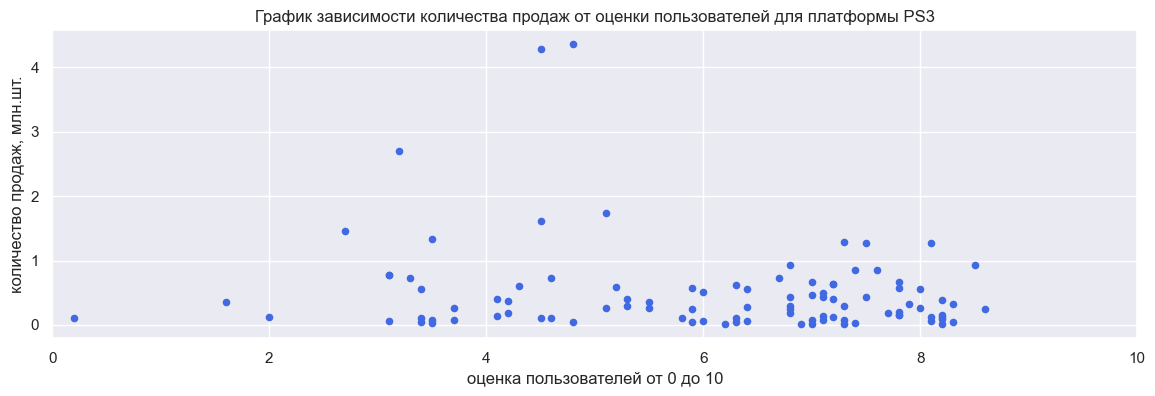


Коэффициент Пирсона зависимости продаж от отзывов пользователей для платформы X360: -0.138444570945665


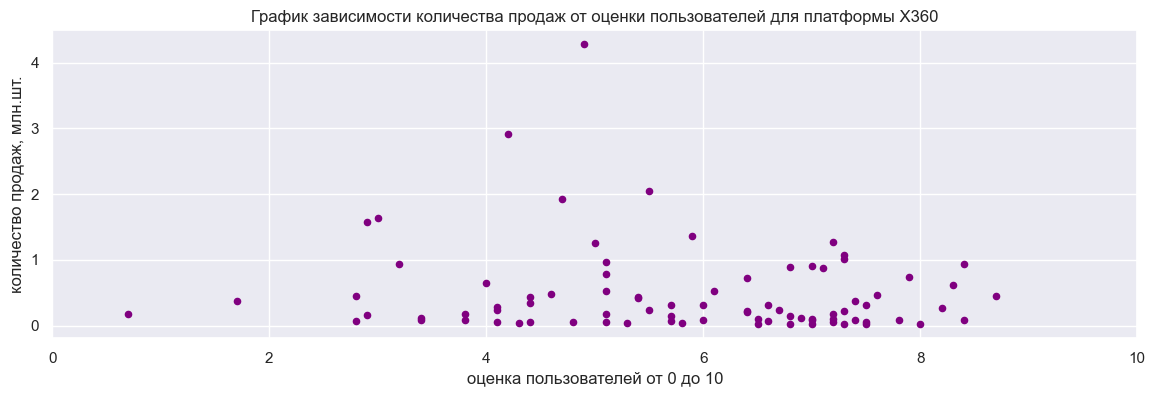

In [103]:
i=0 #счетчик 

for platform in real_data.query('platform in @platform_top5_2years')['platform'].unique():
    real_data.query('platform == @platform').plot(kind='scatter', x='user_score', y='total_sales', \
                                                  color=colors[i], grid=True, xlim=(0, 10), \
                                                  xlabel='оценка пользователей от 0 до 10', \
                                                  ylabel='количество продаж, млн.шт.', \
                                                  title=f'График зависимости количества продаж от оценки пользователей для платформы {platform}')   
    print(f'Коэффициент Пирсона зависимости продаж от отзывов пользователей для платформы {platform}:', real_data.query('platform == @platform')['user_score'].corr(real_data.query('platform == @platform')['total_sales']))
    i += 1
    plt.show()
    print('')

**Вывод:** 

Анализ зависимости количества продаж от отзывов критиков и пользователей был проведен для трех наиболее популярных в течение двух последних лет платформ: PS4, XOne, 3DS, X360, PS3.

- Полученное значение коэффициента Пирсона для платформы X360 равен 0.53 и позволяет сделать вывод о том, что для данной платформы наблюдается средняя зависимость между количеством продаж и отзывами критиков наблюдается умеренная зависимость.
- Полученные значения коэффициентов Пирсона для остальных платформ PS4, 3DS, XOne, PS3 (0.40, 0.31, 0.43, 0.45, соответственно) позволяют сделать вывод о том, что для данных платформ между количеством продаж и отзывами критиков наблюдается слабая зависимость.

- Полученные коэффициенты Пирсона для зависимости между оценкой пользователей и количеством продаж для платформ PS4, 3DS, XOne, PS3, X360 (-0.04, 0.22, -0.07, -0.17, -0.14, соответственно) позволяют сделать вывод о том, что между количеством продаж и отзывами пользователей наблюдается очень слабая связь.

#### Распределение игр по жанрам.

Посмотрим на общее распределение игр по жанрам. 

Определим:
- Что можно сказать о самых прибыльных жанрах
- Выделяются ли жанры с высокими и низкими продажами

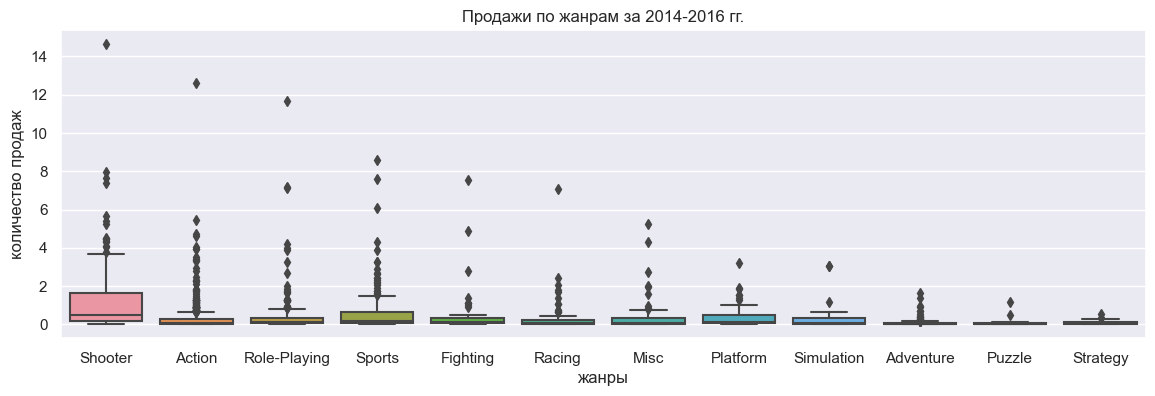

In [104]:
#построим графики "ящик с усами" в разном масштабе по данным за последние 2014-2016 гг.
sns.boxplot(x=real_data['genre'], y=real_data['total_sales']).set(title='Продажи по жанрам за 2014-2016 гг.', xlabel='жанры', ylabel='количество продаж')
plt.show()

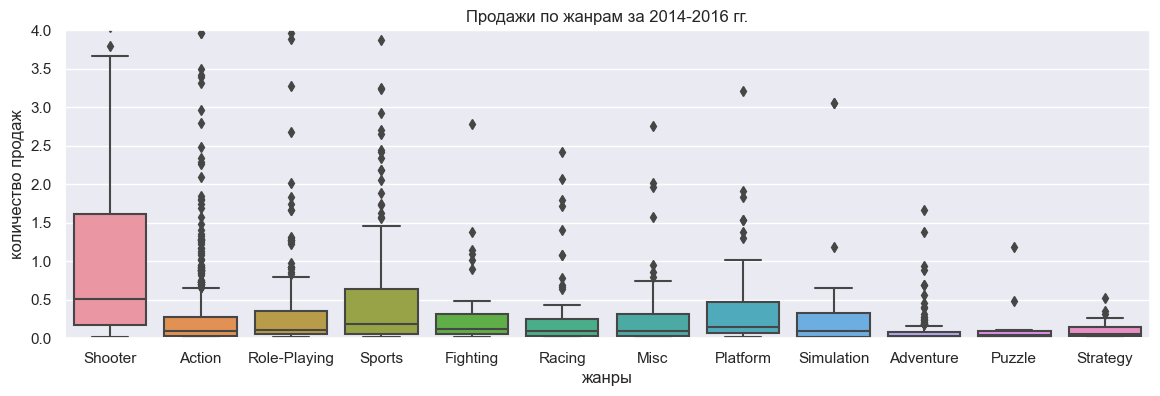

In [105]:
#построим графики "ящик с усами" в разном масштабе по данным за последние 2014-2016 гг.
sns.boxplot(x=real_data['genre'], y=real_data['total_sales']).set(ylim=(0,4), title='Продажи по жанрам за 2014-2016 гг.', xlabel='жанры', ylabel='количество продаж')
plt.show()

In [106]:
print('Медиана по продажам в год для наиболее популярного жанра "Shooter" составляет', round(real_data.query('genre == "Shooter"')['total_sales'].median(), 2), 'млн. продаж на игру в год')
print('Медиана по продажам в год для наименее популярного жанра "Adventure" составляет', round(real_data.query('genre == "Adventure"')['total_sales'].median(), 2), 'млн. продаж на игру в год')

Медиана по продажам в год для наиболее популярного жанра "Shooter" составляет 0.52 млн. продаж на игру в год
Медиана по продажам в год для наименее популярного жанра "Adventure" составляет 0.03 млн. продаж на игру в год


**Вывод:** 
- Наиболее популярным являются жанр Shooter. 
- Наименее популярным является жанр Adventure.
- Между наиболее и наименее популярными жанрами существует большая разница: медиана по продажам в год для наиболее популярного жанра Shooter составляет 0.52 млн. продаж на игру в год, в то время как медиана по продажам в год для наименее популярного жанра Adventure составляет 0.03 млн. продаж на игру в год.

### Портрет пользователя каждого региона.

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### ТОП-5 популярных платформ для каждого региона.

In [107]:
platform_data = real_data.pivot_table(index=['platform'], values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
platform_data

,platform,eu_sales,jp_sales,na_sales
0,3DS,16.12,44.24,22.64
1,PC,17.97,0.00,7.23
2,PS3,25.54,11.22,22.05
3,PS4,130.04,15.02,98.61
4,PSP,0.00,0.36,0.00
5,PSV,3.53,14.54,2.52
6,Wii,2.59,0.00,2.08
7,WiiU,13.15,7.31,19.36
8,X360,15.49,0.08,28.30
9,XOne,46.25,0.32,81.27


In [108]:
#данные для построения графиков по ТОП-5 платформам

def categorize(mas, region):
    total=0
    if region == 'na':
        mas = mas.sort_values(by='na_sales', ascending = False).reset_index(drop=True)
        for index, row in mas.iterrows():
            if index>=5:
                total += mas['na_sales'][index]
        mas = mas.head(5)
        df = {'platform': 'Другие', 'genre' : 'Другие', 'na_sales' : total} 
        mas = pd.concat([mas, pd.DataFrame.from_records(df, index=[0])], ignore_index=True)
       #mas = mas.append(df, ignore_index = True) 
    elif region == 'eu':
        mas = mas.sort_values(by='eu_sales', ascending = False).reset_index(drop=True)
        for index, row in mas.iterrows():
            if index>=5:
                total += mas['eu_sales'][index]
        mas = mas.head(5)
        df = {'platform': 'Другие', 'genre' : 'Другие', 'eu_sales' : total} 
        mas = pd.concat([mas, pd.DataFrame.from_records(df, index=[0])], ignore_index=True)
        #mas = mas.append(df, ignore_index = True) 
    elif region == 'jp':
        mas = mas.sort_values(by='jp_sales', ascending = False).reset_index(drop=True)
        for index, row in mas.iterrows():
            if index>=5:
                total += mas['jp_sales'][index]
        mas = mas.head(5)
        df = {'platform': 'Другие', 'genre' : 'Другие', 'jp_sales' : total} 
        mas = pd.concat([mas, pd.DataFrame.from_records(df, index=[0])], ignore_index=True)
        #mas = mas.append(df, ignore_index = True) 
    return mas

na_data = categorize(platform_data, 'na')
eu_data = categorize(platform_data, 'eu')
jp_data = categorize(platform_data, 'jp')

In [109]:
na_data

,platform,eu_sales,jp_sales,na_sales,genre
0,PS4,130.04,15.02,98.61,NaN
1,XOne,46.25,0.32,81.27,NaN
2,X360,15.49,0.08,28.30,NaN
3,3DS,16.12,44.24,22.64,NaN
4,PS3,25.54,11.22,22.05,NaN
5,Другие,NaN,NaN,31.19,Другие


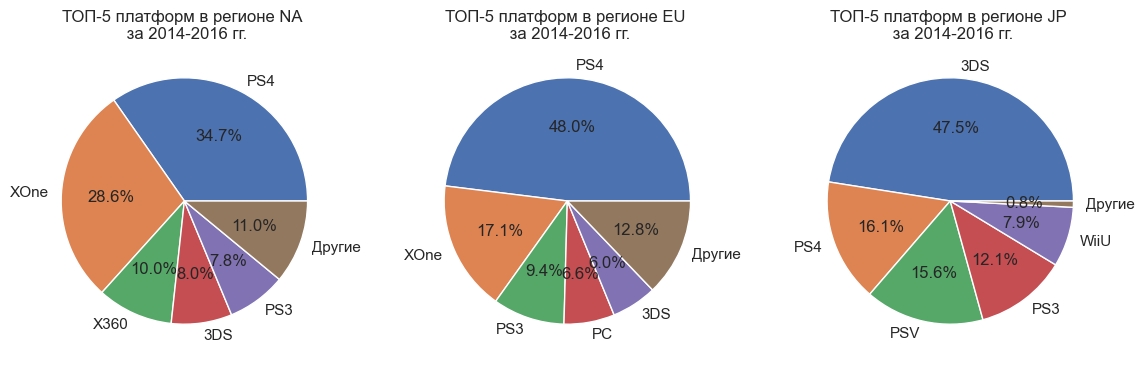

<Figure size 1500x500 with 0 Axes>

In [110]:
#построим круговые диаграммы

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig = plt.figure(figsize=(15, 5))

colors = sns.color_palette('deep')[0:6]

ax1.pie(na_data['na_sales'], labels=na_data['platform'], colors = colors, autopct='%1.1f%%')
ax2.pie(eu_data['eu_sales'], labels=eu_data['platform'], colors = colors, autopct='%1.1f%%')
ax3.pie(jp_data['jp_sales'], labels=jp_data['platform'], colors = colors, autopct='%1.1f%%')

ax1.set_title('ТОП-5 платформ в регионе NA \n за 2014-2016 гг.')
ax2.set_title('ТОП-5 платформ в регионе EU \n за 2014-2016 гг.')
ax3.set_title('ТОП-5 платформ в регионе JP \n за 2014-2016 гг.')

plt.show()

**Вывод:**
- Для региона NA в ТОП-5 популярных платформ за последние два года входят  PS4, XOne, X360, 3DS, PS3. При этом среди ТОП-5 34.7% продаж приходится на PS4, а на XOne и X360 28.6% и 10.0% соответственно.
- Для региона EU в ТОП-5 популярных платформ входят PS4, XOne, PS3, PC, 3DS. При этом около половины продаж приходится на PS4. Можно сделать вывод, что большинство пользователей предпочитают данную платформу.
- Для региона JP в ТОП-5 популярных платформ входят 3DS, PS4, PSV, PS3, WiiU. При этом на 3DS приходится 47.5% всех продаж, а на PS4 - 16.1%.

#### ТОП-5 популярных жанров для каждого региона.

In [111]:
genre_data = real_data.pivot_table(index=['genre'], values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
genre_data

,genre,eu_sales,jp_sales,na_sales
0,Action,74.68,29.58,72.53
1,Adventure,6.49,3.60,5.64
2,Fighting,6.69,6.37,12.43
3,Misc,12.86,5.61,15.05
4,Platform,6.80,2.69,6.79
5,Puzzle,0.52,0.93,0.65
6,Racing,14.13,1.76,8.74
7,Role-Playing,28.17,31.16,33.47
8,Shooter,65.52,4.87,79.02
9,Simulation,7.30,2.31,2.63


In [112]:
#данные для построения графиков по ТОП-5 платформам
na_data_genre = categorize(genre_data, 'na')
eu_data_genre = categorize(genre_data, 'eu')
jp_data_genre = categorize(genre_data, 'jp')

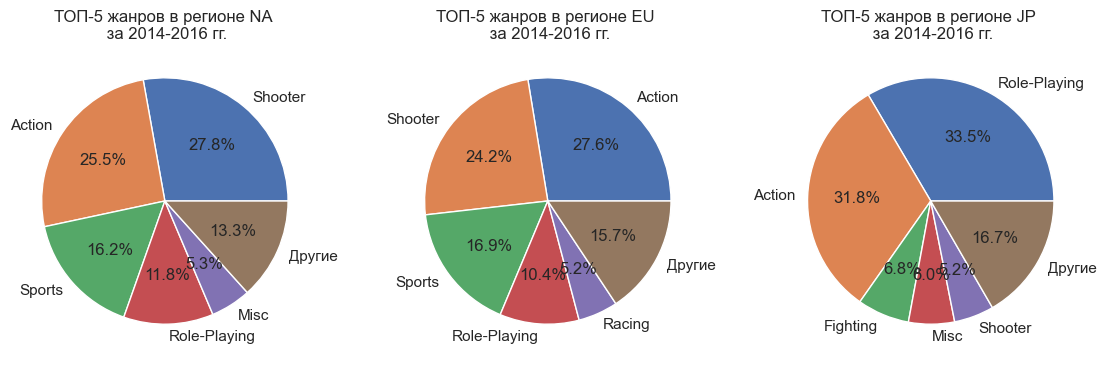

<Figure size 1500x500 with 0 Axes>

In [113]:
#построим круговые диаграммы

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig = plt.figure(figsize=(15, 5))

ax1.pie(na_data_genre['na_sales'], labels=na_data_genre['genre'], colors = colors, autopct='%1.1f%%')
ax2.pie(eu_data_genre['eu_sales'], labels=eu_data_genre['genre'], colors = colors, autopct='%1.1f%%')
ax3.pie(jp_data_genre['jp_sales'], labels=jp_data_genre['genre'], colors = colors, autopct='%1.1f%%')

ax1.set_title('ТОП-5 жанров в регионе NA \n за 2014-2016 гг.')
ax2.set_title('ТОП-5 жанров в регионе EU \n за 2014-2016 гг.')
ax3.set_title('ТОП-5 жанров в регионе JP \n за 2014-2016 гг.')

plt.show()

**Вывод:**
- Для региона NA в ТОП-5 популярных жанров входят Shooter, Action, Sports, Role-Playing, Misc. При этом лидируют Shooter и Action, на которые приходится более 50% всех продаж.
- Для региона EU в ТОП-5 популярных входят Action, Shooter, Sports, Role-Playing, Racing. Тут точно также, как и для региона NA, пользователи отдают предпочтение жанрам Action и Shooter, на которые также приходится около 50% всех продаж.
- Регионы NA и EU отличаются лишь замыкающим ТОП-5 жанром: для NA это Misc, а для EU - Racing. В остальном, портреты пользователей в части любимых жанров совпадают.
- Для региона JP в ТОП-5 популярных входят Role-Playing, Action, Fighting, Misc, Shooter. При этом на Action приходится 31.8% продаж, а на Role-Playing - 33.5%. 

#### Влияние рейтинга ESRB на продажи в отдельном регионе.

Найдем уникальные значения в столбце `rating`. Работать будем с теми данными, где нет пропусков.

In [114]:
data.dropna(subset=['rating'])['rating'].unique()

array(['E', 'Unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Расшифруем данные значения:
- `E` («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально «K-A» («Kids to Adults»)
- `K-A` («Kids to Adults») - «Для всех» (см.выше)
- `M` («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.
- `T` («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
- `E10+`(«Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.
- `AO` («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.
- `EC` («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.
- `RP` («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу
- `Unknown` - поле не заполнено.

In [115]:
data_rating = real_data.pivot_table(index=['rating'], values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').reset_index()
data_rating

,rating,eu_sales,jp_sales,na_sales
0,E,58.06,8.94,50.74
1,E10+,26.16,4.46,33.23
2,M,93.44,8.01,96.42
3,T,34.07,14.78,38.95
4,Unknown,58.95,56.90,64.72


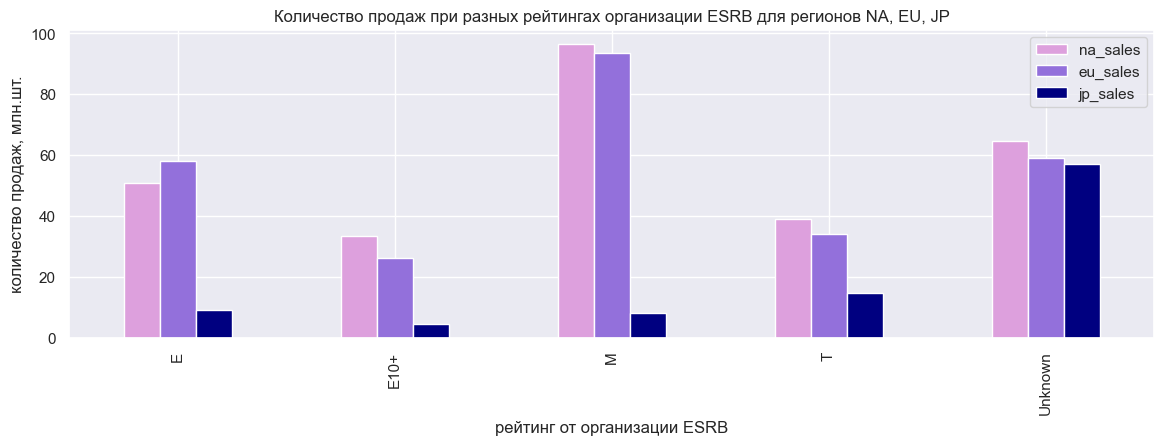

In [116]:
data_rating.plot(x='rating', y=['na_sales', 'eu_sales', 'jp_sales'], kind='bar', color=['plum', 'mediumpurple', 'navy'], \
                grid=True, xlabel='рейтинг от организации ESRB', ylabel='количество продаж, млн.шт.', title='Количество продаж при разных рейтингах организации ESRB для регионов NA, EU, JP')
plt.show()

**Вывод:**
- Рейтинг ESRB влияет практически одинаково на продажи в регионах NA и EU. Наибольшие продажи характерны для рейтинга M, следом идут E, T, E10+.
- Для региона JP наибольшее количество продаж характерно для игр рейтинга T, за которым идут E, M, E10+.
- У большого количества игр с высокими продажами не заполнено поле ESRB. Известно, что ESRB предназначен для маркировки игр для США и Канады. Соответственно, для других регионов он не заполняется. 

### Проверка гипотез.

#### Проверим гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

Гипотезы:

- H0 - Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC.
- H1 - Средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC.

Используем уровень статистической значимости 5%.

In [117]:
#Проверим названия соответствующих платформ в датафрейме
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [118]:
#создадим наборы данных
sample_1 = real_data.query('platform == "XOne"').dropna(subset=['user_score'])['user_score']
sample_2 = real_data.query('platform == "PC"').dropna(subset=['user_score'])['user_score']

In [119]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.11601398086668835
Не получилось отвергнуть нулевую гипотезу


In [120]:
#найдем также средние значения выборок
print('Среднее значение оценки пользователей платформы XOne составляет', sample_1.mean().round(2))
print('Среднее значение оценки пользователей платформы DC составляет', sample_2.mean().round(2))

Среднее значение оценки пользователей платформы XOne составляет 6.59
Среднее значение оценки пользователей платформы DC составляет 6.3


**Вывод:** 
Полученное значение p-value (0.11601398086668832) больше заданного уровня значимости. P-value показывает, что вероятность получить такую же оценку составляет около 12%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними оценками пользователей.
Отвергуть нулевую гипотезу не получилось. 

#### Проверим гипотезу "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные".

Гипотезы:

- H0 - Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу рейтинга Sports.
- H1 - Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу рейтинга Sports.

Используем уровень статистической значимости 5%.

In [121]:
#создадим новые наборы данных
sample_1 = real_data.query('genre == "Action"').dropna(subset=['user_score'])['user_score']
sample_2 = real_data.query('genre == "Sports"').dropna(subset=['user_score'])['user_score']

In [122]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(sample_1, sample_2, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


In [123]:
#найдем также средние значения выборок
print('Среднее значение оценки пользователей платформы XOne составляет', sample_1.mean().round(2))
print('Среднее значение оценки пользователей платформы DC составляет', sample_2.mean().round(2))

Среднее значение оценки пользователей платформы XOne составляет 6.76
Среднее значение оценки пользователей платформы DC составляет 5.23


**Вывод:** Полученное значение p-value (1.1825550382644557e-14) меньше заданного уровня значимости. Таким образом, вероятность получить одинаковую оценку очень мала. Таким образом, отвеграем нулевую гипотезу. Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу рейтинга Sports.

**Вывод по разделу:**
Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам использовали метод `scipy.stats.ttest_ind(array1, array2, equal_var, alternative)`. Используем `equal_var=False`, чтобы не считать равными дисперсии выборок, `alternative=two-sided` по умолчанию, так как используем двусторонний ttest.

Используем уровень статистической значимости `aplha=0.05`. В случае, если p-value окажется меньше заданного значения, будем отвергать нулевую гипотезу.

В первом случае нулевая и альтернативная гипотеза были сформулированы следующим образом:
- H0 - Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC.
- H1 - Средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC.
Полученное значение p-value (0.11601398086668832) больше заданного уровня значимости. P-value показывает, что вероятность получить такую же оценку составляет около 12%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними оценками пользователей.
Отвергуть нулевую гипотезу не получилось. 

Во втором случае нулевая и альтернативная гипотеза были сформулированы следующим образом:
- H0 - Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу рейтинга Sports.
- H1 - Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу рейтинга Sports.
Полученное значение p-value (1.1825550382644557e-14) меньше заданного уровня значимости. Таким образом, вероятность получить одинаковую оценку очень мала. Таким образом, отвеграем нулевую гипотезу. Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу рейтинга Sports.

### Общий вывод

В данном исследовании был произведен анализ данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation).

Были выявлены определяющие успешность игры закономерности, которые помогут сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В датасете содержатся данные до 2016 года. Мы представили, что сейчас декабрь 2016 года, и мы планируем кампанию на 2017 год.

Исследование было проведено на 16715 играх.

**Предобработка данных:**
- Названия столбцов были приведены к нижнему регистру.
- Данные в столбцах были преобразованы в корректные типы.
- Пропуски с годом релиза, а также названием и жанром были исключены из рассмотрения. Их исключение не окажет влияния на итоговый результат, так как данных пропусков менее 2%. Было принято решение не заполнять пропуски в столбцах critic_score, user_score, raiting, так как их заполнение может повлиять на итоговый вывод. К пропускам могли привести ошибки компьютера, а также тот факт, что данные тянутся из разных источников, возможно, некоторые данные в тех источниках являются не считаются и отсутствуют. 
- Был создан дополнительных столбец с суммарный значением продаж по регионам.
- Данные были исследованы на наличие дубликатов. Явные дубликаты отсутствуют. Был обнаружен неявный дубликат, который был удален.

**Выводы:**
- **<u>Исследовательский анализ данных:</u>**
 - **Количество игр, выпускаемых в разные годы.**
   - Гистограмма показала, что с 1980 года количество игр, выпускающихся в год, росло вплоть до 2008 года. Пик приходится на 2008-2009 годы, где количество выпущенных игр составляет 1427 и 1426 штук, соответственно.
   - Затем темп производства игр начал снижаться, и количество выпущенных игр в 2016 году составило 502 штуки.
 - **Изменение продаж по наиболее популярным платформам.** 
   - В ТОП-5 успешных платформ по суммарным продажам входят PS2, X360, PS3, Wii и DS (платформы расположены по убыванию продаж). Суммарное количество продаж в год для этих платформ по имеющимся данным составляет 1233.56, 961.24, 931.34, 891.18 и 802.78 млн.копий, соответственно. 
   - Для всех успешных платформ с наибольшим суммарным количеством продаж графики продаж имеют схожую тенденцию: сначала довольно резко возрастают до определенного пика, а потом более плавно убывают. Максимальное количество продаж в год для ТОП-5 наиболее успешных платформ приходится на PS2 и составляет 211.81 млн. продаж в год. Минимальное количество продаж - на DS и составляет 146.94 млн. продаж в год. 
   - Период жизни платформ составляет 7 лет. Новые платформы появляются за характерный срок около 15 лет.
 - В результате **был определен актуальный период (3 года: с 2014 по 2016 год)**, данные за который позволят сделать корректный прогноз на 2017 год. Дальнейшнее исследование производилось на данных за последние 3 года.
  - **Анализ платформ по росту и падению продаж.** Для оценки потенциально прибыльных платформ были визуализированы данные по количеству продаж для ТОП-5 платформ с наибольшим количеством продаж за последние 3 года (с 2014 по 2016 год).
    - В ТОП-5 по количеству продаж попали платформы: PS4, XOne, 3DS, PS3, X360 (расположены по убыванию количества продаж) с количеством продаж от 48.22 до 288.15 млн. за выбранный период.
    - Потенциально прибыльными платформами являются платформы 3DS, PS4, XOne.
  - Был построен график "ящик с усами" по глобальным продажам в разбивке по платформам. По данным за последние 2 года основной части игр по платформам 3й квартиль по продажам не превышает 1 млн копий. Однако существуют и выбросы - аномально большое количество проданных копий. С их учетом для всех платформ количество продаж для каждой игры в год не превышает 16 млн.копий. Наибольшие медианные значения по количеству продаж характерны для платформ PS4, XOne, WiiU, X360, Wii. В отстающих по количеству продаж за последние 2 года находятся платформы PSP и PSV.
 - **Влияние отзывов пользователей и критиков на количество продаж.**
   - Анализ зависимости количества продаж от отзывов критиков и пользователей был проведен для трех наиболее популярных в течение двух последних лет платформ: PS4, XOne, 3DS, X360, PS3.
   - Полученное значение коэффициента Пирсона для платформы X360 равен 0.53 и позволяет сделать вывод о том, что для данной платформы наблюдается средняя зависимость между количеством продаж и отзывами критиков наблюдается умеренная зависимость.
   - Полученные значения коэффициентов Пирсона для остальных платформ PS4, 3DS, XOne, PS3 (0.40, 0.31, 0.43, 0.45, соответственно) позволяют сделать вывод о том, что для данных платформ между количеством продаж и отзывами критиков наблюдается слабая зависимость.
   - Полученные коэффициенты Пирсона для зависимости между оценкой пользователей и количеством продаж для платформ PS4, 3DS, XOne, PS3, X360 (-0.04, 0.22, -0.07, -0.17, -0.14, соответственно) позволяют сделать вывод о том, что между количеством продаж и отзывами пользователей наблюдается очень слабая связь.
 - **Распределение игр по жанрам.**
   - Наиболее популярным являются жанр Shooter. Наименее популярным является жанр Adventure. Между наиболее и наименее популярными жанрами существует большая разница: медиана по продажам в год для наиболее популярного жанра Shooter составляет 0.52 млн. продаж на игру в год, в то время как медиана по продажам в год для наименее популярного жанра Adventure составляет 0.03 млн. продаж на игру в год.
   
- **<u>Портрет пользователя по регионам:</u>**
 - **В части популярности платформ среди пользователей по регионам:**
   - Для региона NA в ТОП-5 популярных платформ за последние два года входят PS4, XOne, X360, 3DS, PS3. При этом среди ТОП-5 34.7% продаж приходится на PS4, а на XOne и X360 28.6% и 10.0% соответственно.
   - Для региона EU в ТОП-5 популярных платформ входят PS4, XOne, PS3, PC, 3DS. При этом около половины продаж приходится на PS4. Можно сделать вывод, что большинство пользователей предпочитают данную платформу.
   - Для региона JP в ТОП-5 популярных платформ входят 3DS, PS4, PSV, PS3, WiiU. При этом на 3DS приходится 47.5% всех продаж, а на PS4 - 16.1%.
 - **В части популярности жанров среди пользователей по регионам:**
   - Для региона NA в ТОП-5 популярных жанров входят Shooter, Action, Sports, Role-Playing, Misc. При этом лидируют Shooter и Action, на которые приходится более 50% всех продаж.
   - Для региона EU в ТОП-5 популярных входят Action, Shooter, Sports, Role-Playing, Racing. Тут точно также, как и для региона NA, пользователи отдают предпочтение жанрам Action и Shooter, на которые также приходится около 50% всех продаж.
   - Регионы NA и EU отличаются лишь замыкающим ТОП-5 жанром: для NA это Misc, а для EU - Racing. В остальном, портреты пользователей в части любимых жанров совпадают.
   - Для региона JP в ТОП-5 популярных входят Role-Playing, Action, Fighting, Misc, Shooter. При этом на Action приходится 31.8% продаж, а на Role-Playing - 33.5%.
 - **В части влияния рейтинга ESRB на продажи:**
   - Рейтинг ESRB влияет практически одинаково на продажи в регионах NA и EU. Наибольшие продажи характерны для рейтинга M, следом идут E, T, E10+.
   - Для региона JP наибольшее количество продаж характерно для игр рейтинга T, за которым идут E, M, E10+.
   - У большого количества игр с высокими продажами не заполнено поле ESRB. Известно, что ESRB предназначен для маркировки игр для США и Канады. Соответственно, для других регионов он не заполняется. 

- **<u>Проверка гипотез показала, что:</u>**
 - Средний пользовательский рейтинг платформ Xbox One и PC совпадают.
 - Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу рейтинга Sports.